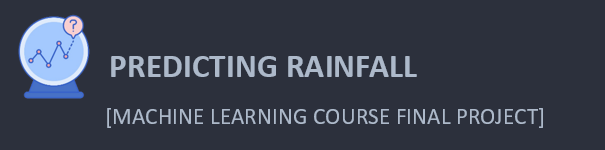

**TABLE OF CONTENTS**

1. [INTRODUCTION](#1introduction)
2. [IMPORTING REQUIRED LIBRARIES AND DATASET](#2importing-required-libraries-and-dataset)
3. [DATA PREPROCESSING](#3data-preprocessing)
4. [IMPLEMENTING ML ALGORITHMS ON DATA](#4implementing-ml-algorithms-on-data)  
   4.1. [Training and Testing Data](#41-training-and-testing-data)  
   4.2. [Linear Regression](#42-linear-regression)  
   4.3. [KNN](#43-knn)  
   4.4. [Decision Tree](#44-decision-tree)  
   4.5. [Logistic Regression](#45-logistic-regression)  
   4.6. [SVM](#46-svm)
5. [REPORT](#5report)


<br>

**1.INTRODUCTION**   <a class="anchor" id="1introduction"></a>

PREDICTING RAINFALL TOMORROW

I am given with a Data Set containing daily weather metrics from 2008 to 2017. The dataset included fields such as date, location, minimum and maximum temperature, wind gust speed, wind direction, humidity, pressure, cloud cover, and rainfall today. These served as independent variables to predict the dependent variable: whether it would rain tomorrow.

The DataSet Link: https://github.com/ChemuruLasya/MyProjects/blob/main/Weather_Data.csv

Here, I am employing four major Supervised Machine Learning Algorithms to do my job with respect to the questions given. They are:
 -  1)KNN, 2)Decision Trees 3)Logistic regression 4)SVM

**2.IMPORTING REQUIRED LIBRARIES AND DATASET** <a class="anchor" id="2importing-required-libraries-and-dataset"></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sckit-learn

DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\apache_beam-2.55.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading e

DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\apache_beam-2.55.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading e

DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\absl_py-2.1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\apache_beam-2.55.0rc1-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\chemu\appdata\local\programs\python\python311\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading e

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Suppress warnings:
import warnings

def custom_warn(*args, **kwargs):
    pass

warnings.warn = custom_warn

In [4]:
#Importing dataset

df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [6]:
# I want to see all the columns and the sample values they are containing

pd.set_option('display.max_columns', None)
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,22,20,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,20,7,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,15,13,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,17,19,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No


In [7]:
#Checking for null values

df.isna().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<p style="color:skyblue; font-size:14px; font-family:Verdana;">There are no null values. so, we are ready to preprocess the data for training with ML models.

**3.DATA PREPROCESSING** <a class="anchor" id="3data-preprocessing"></a>

<p style="color:pink; font-size:14px; font-family:Verdana;">One Hot Encoding

<p style="color:skyblue; font-size:14px; font-family:Verdana;">First, we need to perform one hot encoding to convert categorical variables in columns RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm' to binary variables. So, that we can give them as input variables for the model.


In [8]:
df_sydney_processed = pd.get_dummies(df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

<p style="color:skyblue; font-size:14px; font-family:Verdana;">This results in creating seperate column for each type of category value present in those columns example RainToday column has two category values Yes, No. so, now two different columns will be produced one with RainToday_Yes, RainToday_No and fills with appropriate binary values.

In [9]:
df_sydney_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,RainToday_No,RainToday_Yes,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<p style="color:pink; font-size:14px; font-family:Verdana;">In order to apply ML algorithm I have to convert my output/target variable to Binary values

In [10]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [11]:
df_sydney_processed['RainTomorrow']

0       1
1       1
2       1
3       1
4       1
       ..
3266    0
3267    0
3268    0
3269    0
3270    0
Name: RainTomorrow, Length: 3271, dtype: int64

**4.IMPLEMENTING ML ALGORITHMS ON DATA**   <a class="anchor" id="4implementing-ml-algorithms-on-data"></a>

**4.1.Training and Testing Data**  <a class="anchor" id="41-training-and-testing-data"></a>

Now, we set our 'features' or X values and our Y or target variable.


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
#Cleaning data by removing unnecessary columns for training

df_sydney_processed.drop('Date',axis=1,inplace=True)

In [14]:
#Converting data values in all columns into float values in order to apply ML algorithms with ease and effectively

df_sydney_processed = df_sydney_processed.astype(float)

In [15]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

**4.2.Linear Regression**   <a class="anchor" id="42-linear-regression"></a>

In [16]:
from sklearn.linear_model import LinearRegression

#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [17]:
x_train, x_test, y_train, y_test = train_test_split( features, Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [18]:
LinearReg = LinearRegression()
x = np.asanyarray(x_train)
y = np.asanyarray(y_train)
LinearReg.fit (x, y)
# The coefficients
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [-2.36969339e-02  1.29875746e-02  7.28787926e-04  6.50113548e-03
 -3.51572233e-02  4.23264958e-03  1.82629400e-03  7.88515378e-04
  9.58053504e-04  8.55920072e-03  7.70330233e-03 -9.25181760e-03
 -8.86613652e-03  1.00480015e-02  1.44527900e-02 -3.46452095e-03
  7.85766117e+10  7.85766117e+10 -2.91815694e+09 -2.91815694e+09
 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09
 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09
 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09 -2.91815694e+09
 -2.91815694e+09 -2.91815694e+09 -2.08621007e+10 -2.08621007e+10
 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10
 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10
 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10 -2.08621007e+10
 -2.08621007e+10 -2.08621007e+10  9.57248962e+09  9.57248962e+09
  9.57248962e+09  9.57248962e+09  9.57248962e+09  9.57248962e+09
  9.57248962e+09  9.57248962e+09  9.57248962e+09  9.57248962e+09
  9.572489

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [20]:
# Use the predict method on the testing data (x_test) and save the predictions to an array
predictions = LinearReg.predict(x_test)

# Convert X_test and y_test to numpy arrays
x_test_array = np.asarray(x_test)
y_test_array = np.asarray(y_test)

# Calculate and print the Residual Sum of Squares (RSS)
rss = np.mean((predictions - y_test_array) ** 2)
print(f"Residual Sum of Squares: {rss:.3f}")

# Calculate and print the Explained Variance Score
variance_score = LinearReg.score(x_test_array, y_test_array)
print(f"Variance Score: {variance_score:.3f}")


Residual Sum of Squares: 0.116
Variance Score: 0.427


#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)

# Print the results
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Residual Sum of Squares (MSE): {mse:.3f}")
print(f"R2-Score: {r2:.3f}")


Mean Absolute Error: 0.256
Residual Sum of Squares (MSE): 0.116
R2-Score: 0.427


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [22]:
# Create a dictionary with the error metrics
metrics = {
    'ErrorType': ['MAE', 'MSE', 'R2'],
    'Value': [f'{mae:.3f}', f'{mse:.3f}', f'{r2:.3f}']
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df

,ErrorType,Value
0,MAE,0.256
1,MSE,0.116
2,R2,0.427


<p style="color:skyblue; font-size:14px; font-family:Verdana;">The above is the simplest form of predicting Target Variable in Machine Learning. Let us use the above mentioned algorithms now. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

<p style="color:skyblue; font-size:14px; font-family:Verdana;">After training each of the above ML Algorithms on the given data set, we need measures for determining the performance of the model.so, here I am using four scores for knowing and comparing correctness of models

<p style="color:skyblue; font-size:14px; font-family:Verdana;">Accuracy: The ratio of correctly predicted instances to the total instances. It measures the overall correctness of the model.

<p style="color:skyblue; font-size:14px; font-family:Verdana;">Jaccard Index: Measures the similarity between predicted and actual classes, calculated as the size of the intersection divided by the size of the union of the predicted and actual sets.

<p style="color:skyblue; font-size:14px; font-family:Verdana;">F1 Score: The harmonic mean of precision and recall, which considers both false positives and false negatives.

<p style="color:skyblue; font-size:14px; font-family:Verdana;">Log Loss: Measures the performance of a classification model with probability outputs, where lower values indicate better performance.

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

**4.3.KNN**    <a class="anchor" id="43-knn"></a>

<p style="color:pink; font-size:14px; font-family:Verdana;">KNN - It is a simple and effective supervised ML method used for both classification and regression tasks. It predicts the class of new data point by comparing it into its K-Nearest Neighbors in training Data Set.

#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [25]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [26]:
predictions = knn.predict(x_test)
predictions[0:5]

array([0., 0., 1., 0., 0.])

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [27]:
# Calculate the KNN metrics
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)
KNN_Log_Loss = log_loss(y_test, predictions)

# Print the results
print(f"KNN Accuracy Score: {KNN_Accuracy_Score:.3f}")
print(f"KNN Jaccard Index: {KNN_JaccardIndex:.3f}")
print(f"KNN F1 Score: {KNN_F1_Score:.3f}")
print(f"Log Loss: {KNN_Log_Loss:.3f}")


KNN Accuracy Score: 0.818
KNN Jaccard Index: 0.425
KNN F1 Score: 0.597
Log Loss: 6.548


**4.4.Decision Tree** <a class="anchor" id="44-decision-tree"></a>

<p style="color:pink; font-size:14px; font-family:Verdana;">Decision Trees: A supervised ML algorithm that organizes data into a tree like structure to make predictions by recursively splitting data based on attribute values.

#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [28]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [29]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [30]:
# Calculate the metrics for the Decision Tree model
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)
Tree_Log_Loss = log_loss(y_test, predictions)

# Print the results
print(f"Tree Accuracy Score: {Tree_Accuracy_Score:.3f}")
print(f"Tree Jaccard Index: {Tree_JaccardIndex:.3f}")
print(f"Tree F1 Score: {Tree_F1_Score:.3f}")
print(f"Tree Log Loss: {Tree_Log_Loss:.3f}")

Tree Accuracy Score: 0.815
Tree Jaccard Index: 0.427
Tree F1 Score: 0.598
Tree Log Loss: 6.658


**4.5.Logistic Regression**  <a class="anchor" id="45-logistic-regression"></a>

<p style="color:pink; font-size:14px; font-family:Verdana;">Logistic Regression: Used for Binary Classification tasks where the dependent variable is categorical and has two possible outcomes. It estimates the probability of outcome by fitting logarithmic function and maps the predictions to 0 and 1 based on the threshold set.

#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.2, random_state =1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [32]:
#Setting C to 0.01 means a higher regularization strength. The model will be penalized more for having large coefficients, which helps to prevent overfitting and encourages a simpler model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [33]:
predictions = LR.predict(x_test)

In [34]:
predict_proba = LR.predict_proba(x_test).round()
predict_proba

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [35]:
# Calculate the metrics for the Logistic Regression model
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

# Print the results
print(f"LR Accuracy Score: {LR_Accuracy_Score:.3f}")
print(f"LR Jaccard Index: {LR_JaccardIndex:.3f}")
print(f"LR F1 Score: {LR_F1_Score:.3f}")
print(f"LR Log Loss: {LR_Log_Loss:.3f}")

LR Accuracy Score: 0.827
LR Jaccard Index: 0.484
LR F1 Score: 0.652
LR Log Loss: 6.218


**4.6.SVM**  <a class="anchor" id="46-svm"></a>

<p style="color:pink; font-size:14px; font-family:Verdana;">SVM - SVM algorithm finds the best boundary called a hyperplane, that separates data points of different classes in such a way that the margin meaning the distance between the boundary and the nearest data points of each class is maximized. This helps the model make accurate predictions on new, unseen data

#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [36]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train) 

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [37]:
predictions = SVM.predict(x_test)
predictions

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0.

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [38]:
# Calculate the metrics for the SVM model
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

# To calculate Log Loss, I am using predict_proba for probabilities
SVM_Log_Loss = log_loss(y_test, predict_proba)

# Print the results
print(f"SVM Accuracy Score: {SVM_Accuracy_Score:.3f}")
print(f"SVM Jaccard Index: {SVM_JaccardIndex:.3f}")
print(f"SVM F1 Score: {SVM_F1_Score:.3f}")
print(f"SVM Log Loss: {SVM_Log_Loss:.3f}")

SVM Accuracy Score: 0.846
SVM Jaccard Index: 0.535
SVM F1 Score: 0.697
SVM Log Loss: 6.218


**   **

**5.REPORT**   <a class="anchor" id="5report"></a>

#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.


In [39]:
dict = {'Values':['Accuracy','JaccardIndex','F1_Score','Log_Loss'],'KNN':[KNN_Accuracy_Score,KNN_JaccardIndex,KNN_F1_Score,KNN_Log_Loss],
       'DecisionTree':[Tree_Accuracy_Score,Tree_JaccardIndex,Tree_F1_Score,Tree_Log_Loss],'LR':[LR_Accuracy_Score,LR_JaccardIndex,
LR_F1_Score,LR_Log_Loss],'SVM':[SVM_Accuracy_Score,SVM_JaccardIndex,SVM_F1_Score,SVM_Log_Loss]}
df = pd.DataFrame(dict)
display(df)

,Values,KNN,DecisionTree,LR,SVM
0,Accuracy,0.818321,0.815267,0.827481,0.845802
1,JaccardIndex,0.425121,0.426540,0.484018,0.534562
2,F1_Score,0.596610,0.598007,0.652308,0.696697
3,Log_Loss,6.548389,6.658446,6.218218,6.218218


<p style="color:skyblue; font-size:14px; font-family:Verdana;">A model is generally considered good if, it has a high accuracy,higher Jaccard Index, higher F1 Score indicating a better balance between precision (accuracy of the positive predictions) and recall (coverage of the actual positive cases).A model with an F1 Score close to 1 and lower Log Loss values indicate a good model. Log Loss evaluates how well the predicted probabilities match the actual class labels, penalizing incorrect predictions with greater confidence more heavily. A good model will have a Log Loss close to 0.

**From the above results we can conclude that SVM algorithm is performing well on the given Data Set in predicting Rainfall compared to other Algorithms.**

**   **